In [6]:
%matplotlib inline


# Quick start guide

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib.

.. redirect-from:: /tutorials/introductory/usage


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on `.Figure`\s (e.g., windows, Jupyter
widgets, etc.), each of which can contain one or more `~.axes.Axes`, an
area where points can be specified in terms of x-y coordinates (or theta-r
in a polar plot, x-y-z in a 3D plot, etc.).  The simplest way of
creating a Figure with an Axes is using `.pyplot.subplots`. We can then use
`.Axes.plot` to draw some data on the Axes:



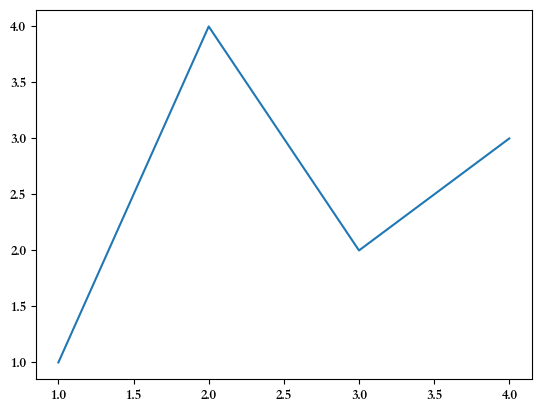

In [19]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Note that to get this Figure to display, you may have to call ``plt.show()``,
depending on your backend.  For more details of Figures and backends, see
`figure_explanation`.


## Parts of a Figure

Here are the components of a Matplotlib Figure.

<img src="file://../../_static/anatomy.png">

### :class:`~matplotlib.figure.Figure`

The **whole** figure.  The Figure keeps
track of all the child :class:`~matplotlib.axes.Axes`, a group of
'special' Artists (titles, figure legends, colorbars, etc), and
even nested subfigures.

The easiest way to create a new Figure is with pyplot::

   fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
   # a figure with one axes on the left, and two on the right:
   fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                                  ['left', 'right_bottom]])

It is often convenient to create the Axes together with the Figure, but you
can also manually add Axes later on.  Note that many
:doc:`Matplotlib backends </users/explain/backends>` support zooming and
panning on figure windows.

For more on Figures, see `figure_explanation`.

### :class:`~matplotlib.axes.Axes`

An Axes is an Artist attached to a Figure that contains a region for
plotting data, and usually includes two (or three in the case of 3D)
:class:`~matplotlib.axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) that provide ticks and tick labels to
provide scales for the data in the Axes. Each :class:`~.axes.Axes` also
has a title
(set via :meth:`~matplotlib.axes.Axes.set_title`), an x-label (set via
:meth:`~matplotlib.axes.Axes.set_xlabel`), and a y-label set via
:meth:`~matplotlib.axes.Axes.set_ylabel`).

The :class:`~.axes.Axes` class and its member functions are the primary
entry point to working with the OOP interface, and have most of the
plotting methods defined on them (e.g. ``ax.plot()``, shown above, uses
the `~.Axes.plot` method)

### :class:`~matplotlib.axis.Axis`

These objects set the scale and limits and generate ticks (the marks
on the Axis) and ticklabels (strings labeling the ticks).  The location
of the ticks is determined by a `~matplotlib.ticker.Locator` object and the
ticklabel strings are formatted by a `~matplotlib.ticker.Formatter`.  The
combination of the correct `.Locator` and `.Formatter` gives very fine
control over the tick locations and labels.

### :class:`~matplotlib.artist.Artist`

Basically, everything visible on the Figure is an Artist (even
`.Figure`, `Axes <.axes.Axes>`, and `~.axis.Axis` objects).  This includes
`.Text` objects, `.Line2D` objects, :mod:`.collections` objects, `.Patch`
objects, etc. When the Figure is rendered, all of the
Artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.


## Types of inputs to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as
input, or objects that can be passed to `numpy.asarray`.
Classes that are similar to arrays ('array-like') such as `pandas`
data objects and `numpy.matrix` may not work as intended.  Common convention
is to convert these to `numpy.array` objects prior to plotting.
For example, to convert a `numpy.matrix` ::

  b = np.matrix([[1, 2], [3, 4]])
  b_asarray = np.asarray(b)

Most methods will also parse an addressable object like a *dict*, a
`numpy.recarray`, or a `pandas.DataFrame`.  Matplotlib allows you to
provide the ``data`` keyword argument and generate plots passing the
strings corresponding to the *x* and *y* variables.



Text(0, 0.5, 'entry b')

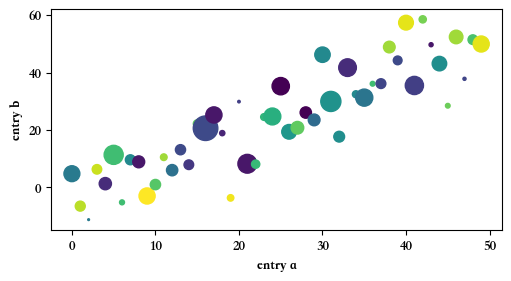

In [20]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')


## Coding styles

### The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the
  "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and
  use pyplot functions for plotting.

See `api_interfaces` for an explanation of the tradeoffs between the
implicit and explicit interfaces.

So one can use the OO-style



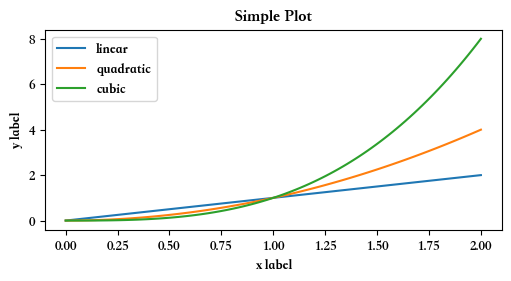

In [8]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or the pyplot-style:



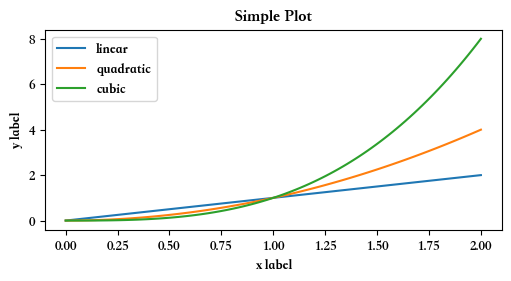

In [9]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

(In addition, there is a third approach, for the case when embedding
Matplotlib in a GUI application, which completely drops pyplot, even for
figure creation. See the corresponding section in the gallery for more info:
`user_interfaces`.)

Matplotlib's documentation and examples use both the OO and the pyplot
styles. In general, we suggest using the OO style, particularly for
complicated plots, and functions and scripts that are intended to be reused
as part of a larger project. However, the pyplot style can be very convenient
for quick interactive work.

<div class="alert alert-info"><h4>Note</h4><p>You may find older examples that use the ``pylab`` interface,
   via ``from pylab import *``. This approach is strongly deprecated.</p></div>

### Making a helper functions

If you need to make the same plots over and over again with different data
sets, or want to easily wrap Matplotlib methods, use the recommended
signature function below.



In [10]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:



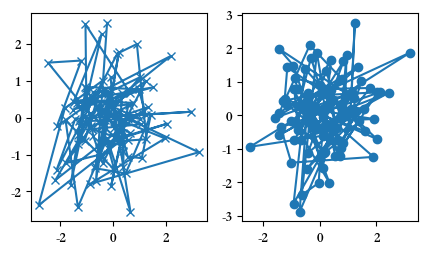

In [11]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

Note that if you want to install these as a python package, or any other
customizations you could use one of the many templates on the web;
Matplotlib has one at [mpl-cookiecutter](https://github.com/matplotlib/matplotlib-extension-cookiecutter)


## Styling Artists

Most plotting methods have styling options for the Artists, accessible either
when a plotting method is called, or from a "setter" on the Artist.  In the
plot below we manually set the *color*, *linewidth*, and *linestyle* of the
Artists created by `~.Axes.plot`, and we set the linestyle of the second line
after the fact with `~.Line2D.set_linestyle`.



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

Matplotlib has a very flexible array of colors that are accepted for most
Artists; see the :doc:`colors tutorial </tutorials/colors/colors>` for a
list of specifications. Some Artists will take multiple colors.  i.e. for
a `~.Axes.scatter` plot, the edge of the markers can be different colors
from the interior:



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and
available for Artists that have stroked lines.  Similarly, stroked lines
can have a linestyle.  See the :doc:`linestyles example
</gallery/lines_bars_and_markers/linestyles>`.

Marker size depends on the method being used.  `~.Axes.plot` specifies
markersize in points, and is generally the "diameter" or width of the
marker.  `~.Axes.scatter` specifies markersize as approximately
proportional to the visual area of the marker.  There is an array of
markerstyles available as string codes (see :mod:`~.matplotlib.markers`), or
users can define their own `~.MarkerStyle` (see
:doc:`/gallery/lines_bars_and_markers/marker_reference`):



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots

### Axes labels and text

`~.Axes.set_xlabel`, `~.Axes.set_ylabel`, and `~.Axes.set_title` are used to
add text in the indicated locations (see :doc:`/tutorials/text/text_intro`
for more discussion).  Text can also be directly added to plots using
`~.Axes.text`:



In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the `~.Axes.text` functions return a `matplotlib.text.Text`
instance.  Just as with lines above, you can customize the properties by
passing keyword arguments into the text functions::

  t = ax.set_xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in
:doc:`/tutorials/text/text_props`.

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    ax.set_title(r'$\sigma_i=15$')

where the ``r`` preceding the title string signifies that the string is a
*raw* string and not to treat backslashes as python escapes.
Matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts – for details see
:doc:`/tutorials/text/mathtext`.  You can also use LaTeX directly to format
your text and incorporate the output directly into your display figures or
saved postscript – see :doc:`/tutorials/text/usetex`.

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing
to *xy*, to a piece of text at *xytext*:



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both *xy* and *xytext* are in data coordinates.
There are a variety of other coordinate systems one can choose -- see
`annotations-tutorial` and `plotting-guide-annotation` for
details.  More examples also can be found in
:doc:`/gallery/text_labels_and_annotations/annotation_demo`.

### Legends

Often we want to identify lines or markers with a `.Axes.legend`:



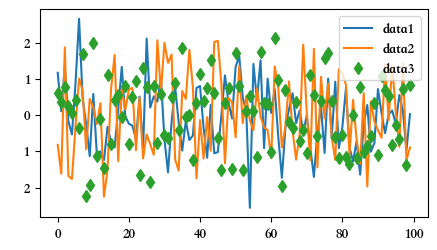

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent. They are discussed in detail in
:doc:`/tutorials/intermediate/legend_guide`.

## Axis scales and ticks

Each Axes has two (or three) `~.axis.Axis` objects representing the x- and
y-axis. These control the *scale* of the Axis, the tick *locators* and the
tick *formatters*. Additional Axes can be attached to display further Axis
objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales,
such as a log-scale.  Since log-scales are used so much there are also
direct methods like `~.Axes.loglog`, `~.Axes.semilogx`, and
`~.Axes.semilogy`.  There are a number of scales (see
:doc:`/gallery/scales/scales` for other examples).  Here we set the scale
manually:



Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

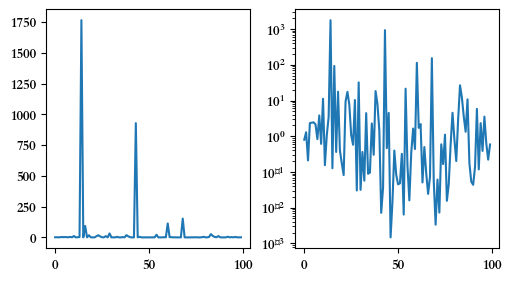

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)
axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This
happens in both directions, and gets combined into a *transform*, which
is the way that Matplotlib maps from data coordinates to Axes, Figure, or
screen coordinates.  See :doc:`/tutorials/advanced/transforms_tutorial`.

### Tick locators and formatters

Each Axis has a tick *locator* and *formatter* that choose where along the
Axis objects to put tick marks.  A simple interface to this is
`~.Axes.set_xticks`:



Text(0.5, 1.0, 'Manual ticks')

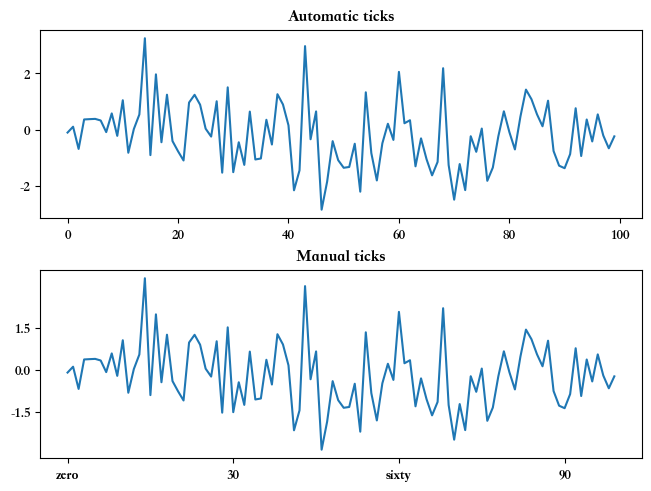

In [15]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

Different scales can have different locators and formatters; for instance
the log-scale above uses `~.LogLocator` and `~.LogFormatter`. See
:doc:`/gallery/ticks/tick-locators` and
:doc:`/gallery/ticks/tick-formatters` for other formatters and
locators and information for writing your own.

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as
well as floating point numbers.  These get special locators and formatters
as appropriate.  For dates:



960


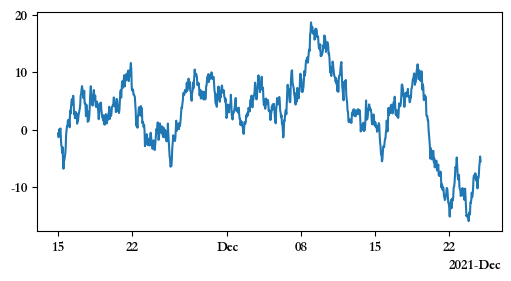

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples
(e.g. :doc:`/gallery/text_labels_and_annotations/date`)

For strings, we get categorical plotting (see:
:doc:`/gallery/lines_bars_and_markers/categorical_variables`).



<BarContainer object of 4 artists>

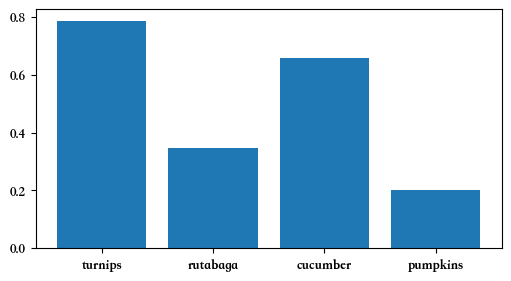

In [23]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

One caveat about categorical plotting is that some methods of parsing
text files return a list of strings, even if the strings all represent
numbers or dates.  If you pass 1000 strings, Matplotlib will think you
meant 1000 categories and will add 1000 ticks to your plot!


### Additional Axis objects

Plotting data of different magnitude in one chart may require
an additional y-axis. Such an Axis can be created by using
`~.Axes.twinx` to add a new Axes with an invisible x-axis and a y-axis
positioned at the right (analogously for `~.Axes.twiny`). See
:doc:`/gallery/subplots_axes_and_figures/two_scales` for another example.

Similarly, you can add a `~.Axes.secondary_xaxis` or
`~.Axes.secondary_yaxis` having a different scale than the main Axis to
represent the data in different scales or units. See
:doc:`/gallery/subplots_axes_and_figures/secondary_axis` for further
examples.



In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## Color mapped data

Often we want to have a third dimension in a plot represented by a colors in
a colormap. Matplotlib has a number of plot types that do this:



Text(0.5, 1.0, 'scatter()')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


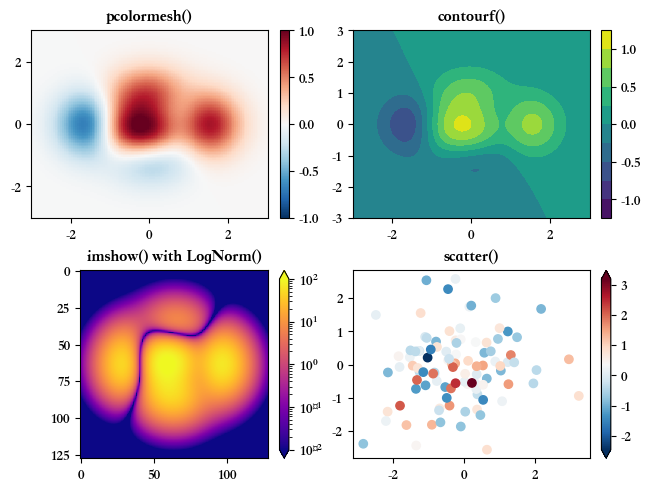

In [24]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### Colormaps

These are all examples of Artists that derive from  `~.ScalarMappable`
objects.  They all can set a linear mapping between *vmin* and *vmax* into
the colormap specified by *cmap*.  Matplotlib has many colormaps to choose
from (:doc:`/tutorials/colors/colormaps`) you can make your
own (:doc:`/tutorials/colors/colormap-manipulation`) or download as
[third-party packages](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as
in the ``LogNorm`` example above.  We do this by supplying the
ScalarMappable with the *norm* argument instead of *vmin* and *vmax*.
More normalizations are shown at :doc:`/tutorials/colors/colormapnorms`.

### Colorbars

Adding a `~.Figure.colorbar` gives a key to relate the color back to the
underlying data. Colorbars are figure-level Artists, and are attached to
a ScalarMappable (where they get their information about the norm and
colormap) and usually steal space from a parent Axes.  Placement of
colorbars can be complex: see
:doc:`/gallery/subplots_axes_and_figures/colorbar_placement` for
details.  You can also change the appearance of colorbars with the
*extend* keyword to add arrows to the ends, and *shrink* and *aspect* to
control the size.  Finally, the colorbar will have default locators
and formatters appropriate to the norm.  These can be changed as for
other Axis objects.


## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to
``fig = plt.figure()`` or ``fig2, ax = plt.subplots()``.  By keeping the
object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is
``plt.subplots()`` as used above.  One can achieve more complex layouts,
with Axes objects spanning columns or rows, using `~.pyplot.subplot_mosaic`.



In [ ]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

Matplotlib has quite sophisticated tools for arranging Axes: See
:doc:`/tutorials/intermediate/arranging_axes` and
:doc:`/gallery/subplots_axes_and_figures/mosaic`.


## More reading

For more plot types see :doc:`Plot types </plot_types/index>` and the
:doc:`API reference </api/index>`, in particular the
:doc:`Axes API </api/axes_api>`.

